In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import scipy.interpolate as interp
import pandas as pd
from helpers import *
# ensure the notebook generate the same randomess
np.random.seed(1)


In [2]:
N = 2
R = [10**3,10**5, 10**7]


### Gdy wszyscy gracze przyjmują jako strategię równowagę Bayesa-Nasha

In [3]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(r,N))
    b =  bet_Bayes_Nash(N, v)

    x=np.argmax(b, axis=1)
    Welf = v[np.arange(r), x]
    Opt =v.max(axis = 1)
    PoA.append(np.mean(Welf/Opt))
print(R)
print(PoA)
pd.DataFrame({"R":R, 'PoA':PoA})

[1000, 100000, 10000000]
[1.0, 1.0, 1.0]


,R,PoA
0,1000,1.0
1,100000,1.0
2,10000000,1.0


### Gdy oferty są losowe z rozkładu U(0,1)

In [4]:
N = 2
R = [10, 10**3,10**5, 10**7]

In [5]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(r, N))
    b =  bet_random(v)

    x=np.argmax(b, axis=1)
    Welf = v[np.arange(r), x]
    Opt =v.max(axis = 1)
    PoA.append(np.mean(Welf/Opt))

pd.DataFrame({"R":R, 'PoA':PoA})

,R,PoA
0,10,0.957290
1,1000,0.909311
2,100000,0.917083
3,10000000,0.916711


## Gdy wyceny są różne

In [6]:
N = 2
R = [10, 10**3, 10**5, 10**7]

In [7]:
PoA = []
for r in R: 
    v1 = np.random.uniform(0, 1, (1, r))
    v2 = np.random.uniform(0, 2, (1, r))
    
    v = np.vstack((v1, v2))
    b1 = bet_uneven_Bayes_Nash(v1, 1)
    b2 = bet_uneven_Bayes_Nash(v2, 2)
    b =  np.vstack((b1, b2))
    x=np.argmax(b, axis=0)
    Welf = v[x, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA.append(np.mean(Welf/Opt))
print(R)
print(PoA)
pd.DataFrame({"R":R, 'PoA':PoA})

[10, 1000, 100000, 10000000]
[1.0, 0.9827922882165135, 0.9845029153929848, 0.9838927076000386]


,R,PoA
0,10,1.000000
1,1000,0.982792
2,100000,0.984503
3,10000000,0.983893


In [8]:
N = 2
R = [10, 10**3,10**5, 10**7]

In [9]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(N,r))
    b =  bet_random(v)

    x=np.argmax(b, axis=0)
    Welf = v[x, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA.append(np.mean(Welf/Opt))

pd.DataFrame({"R":R, 'PoA':PoA})

,R,PoA
0,10,0.887310
1,1000,0.918114
2,100000,0.916429
3,10000000,0.916706


## Rysowanie

### Oferty z U(0,1)

In [10]:
n = 100
r = 10000

In [11]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b = bet_random(v)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

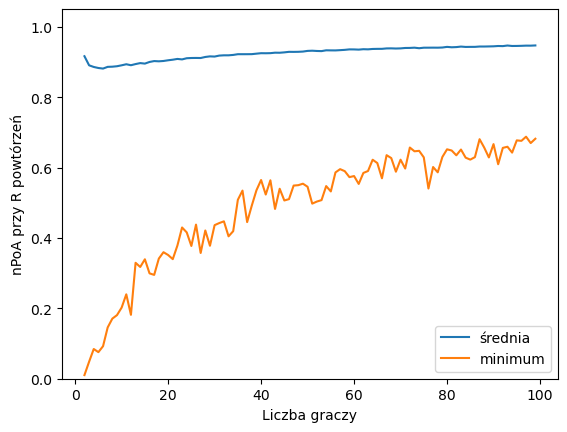

In [12]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
plt.ylim(0, 1.05)
ax.legend()
plt.savefig('pictures/uniform/uniform_first_price.png')

### Gdy oferty są losowe z rozkładu Normalnego bez overbettingu

In [13]:
PoA_mean = []
PoA_min = []
for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b_mean = bet_Bayes_Nash(N, v)
    b_variance = produce_variance(b_mean, v)
    b = negative_to_zero(bet_normal(b_mean,b_variance), 1)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

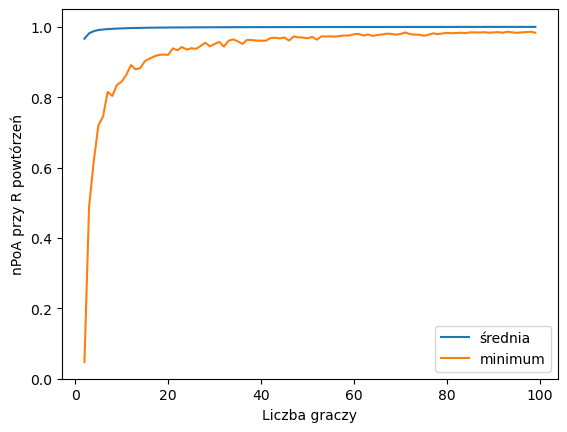

In [14]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.savefig('pictures/no_overbetting/normal_first_price.png')

### Gdy oferty są losowe z rozkładu Normalnego z overbettingiem

In [15]:
PoA_mean = []
PoA_min = []
for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b_mean = bet_Bayes_Nash(N, v)
    b_variance = produce_variance(b_mean, 1)
    b = negative_to_zero(bet_normal(b_mean,b_variance), 1)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

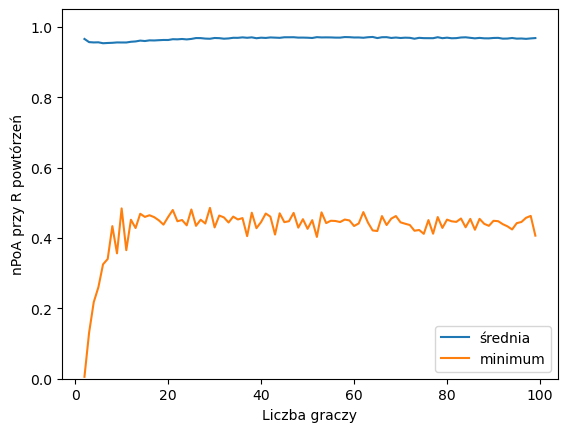

In [16]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.savefig('pictures/overbetting/normal_first_price.png')

### Wpływ zmiany ilości powtórzeń

In [17]:
n = 100
R = [100, 1000, 100000]

In [18]:
PoA_mean_uni = []
PoA_min_uni = []
for r in R:
    mean_tmp = []
    min_tmp = []
    for N in range(2,n): 
        v = np.random.uniform(0,1,(N,r))
        b = bet_random(v)
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        mean_tmp.append(np.mean(PoA))
        min_tmp.append(min(PoA))
    PoA_mean_uni.append(mean_tmp)
    PoA_min_uni.append(min_tmp)

In [19]:
PoA_mean_norm = []
PoA_min_norm = []
for r in R:
    mean_tmp = []
    min_tmp = []
    for N in range(2,n): 
        v = np.random.uniform(0,1,(N,r))
        b_mean = bet_Bayes_Nash(N, v)
        b_variance = produce_variance(b_mean, v)
        b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        mean_tmp.append(np.mean(PoA))
        min_tmp.append(min(PoA))
    PoA_mean_norm.append(mean_tmp)
    PoA_min_norm.append(min_tmp)

/tmp/ipykernel_14229/1751459095.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax[0,0], ax[0,0]], labels=labels,


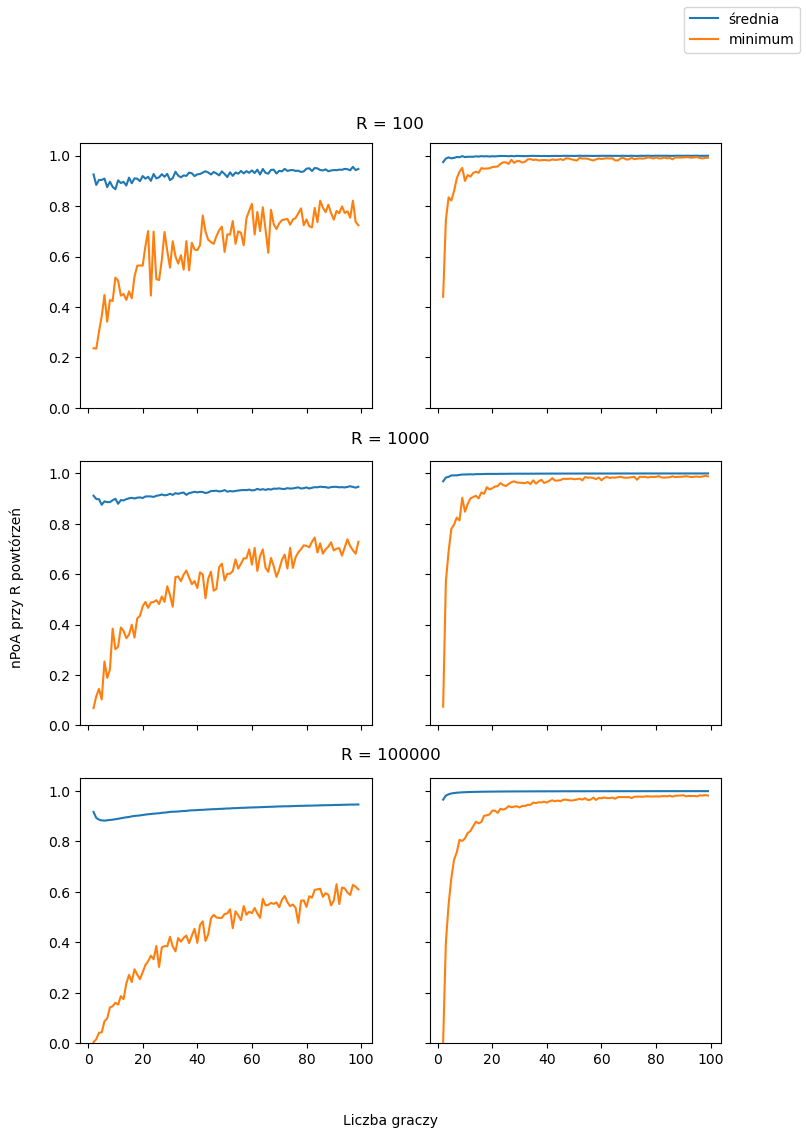

In [20]:
fig, ax = plt.subplots(3,2, figsize=(8.27, 11.69), sharex='all', sharey='all')
x = list(range(2,n))
ax[0,0].plot(x,PoA_mean_uni[0], label = 'średnia')
ax[0,0].plot(x,PoA_min_uni[0], label = 'minimum')

ax[1,0].plot(x,PoA_mean_uni[1], label = 'średnia')
ax[1,0].plot(x,PoA_min_uni[1], label = 'minimum')

ax[2,0].plot(x,PoA_mean_uni[2], label = 'średnia')
ax[2,0].plot(x,PoA_min_uni[2], label = 'minimum')
ax[0,1].plot(x,PoA_mean_norm[0], label = 'średnia')
ax[0,1].plot(x,PoA_min_norm[0], label = 'minimum')
ax[1,1].plot(x,PoA_mean_norm[1], label = 'średnia')
ax[1,1].plot(x,PoA_min_norm[1], label = 'minimum')
ax[2,1].plot(x,PoA_mean_norm[2], label = 'średnia')
ax[2,1].plot(x,PoA_min_norm[2], label = 'minimum')


labels = ['średnia', 'minimum']
fig.legend([ax[0,0], ax[0,0]], labels=labels, 
           loc="upper right") 
plt.figtext(0.5,0.89, "R = 100", ha="center", va = "bottom", fontsize=12)
plt.figtext(0.5,0.62, "R = 1000", ha="center", va = "bottom", fontsize=12)
plt.figtext(0.5,0.35, "R = 100000", ha="center", va = "bottom", fontsize=12)
fig.text(0.04, 0.5, 'nPoA przy R powtórzeń', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Liczba graczy', ha='center')
plt.ylim(0, 1.05)

plt.savefig('pictures/extras/repetitions.png')

### Wpływ zmiany ilości graczy

In [21]:
NN = [200, 400, 1000]
r = 10000

In [ ]:
PoA_mean_uni = []
PoA_min_uni = []
for n in NN:
    mean_tmp = []
    min_tmp = []
    for N in range(2,n): 
        v = np.random.uniform(0,1,(N,r))
        b = bet_random(v)
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        mean_tmp.append(np.mean(PoA))
        min_tmp.append(min(PoA))
    PoA_mean_uni.append(mean_tmp)
    PoA_min_uni.append(min_tmp)

In [ ]:
PoA_mean_norm = []
PoA_min_norm = []
for n in NN:
    mean_tmp = []
    min_tmp = []
    for N in range(2,n): 
        v = np.random.uniform(0,1,(N,r))
        b_mean = bet_Bayes_Nash(N, v)
        b_variance = produce_variance(b_mean, v)
        b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        mean_tmp.append(np.mean(PoA))
        min_tmp.append(min(PoA))
    PoA_mean_norm.append(mean_tmp)
    PoA_min_norm.append(min_tmp)

In [ ]:
PoA_mean_norm_over = []
PoA_min_norm_over = []
for n in NN:
    mean_tmp = []
    min_tmp = []
    for N in range(2,n): 
        v = np.random.uniform(0,1,(N,r))
        b_mean = bet_Bayes_Nash(N, v)
        b_variance = produce_variance(b_mean, 1)
        b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        mean_tmp.append(np.mean(PoA))
        min_tmp.append(min(PoA))
    PoA_mean_norm_over.append(mean_tmp)
    PoA_min_norm_over.append(min_tmp)

/tmp/ipykernel_14229/1507629026.py:32: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax[0,0], ax[0,0]], labels=labels,


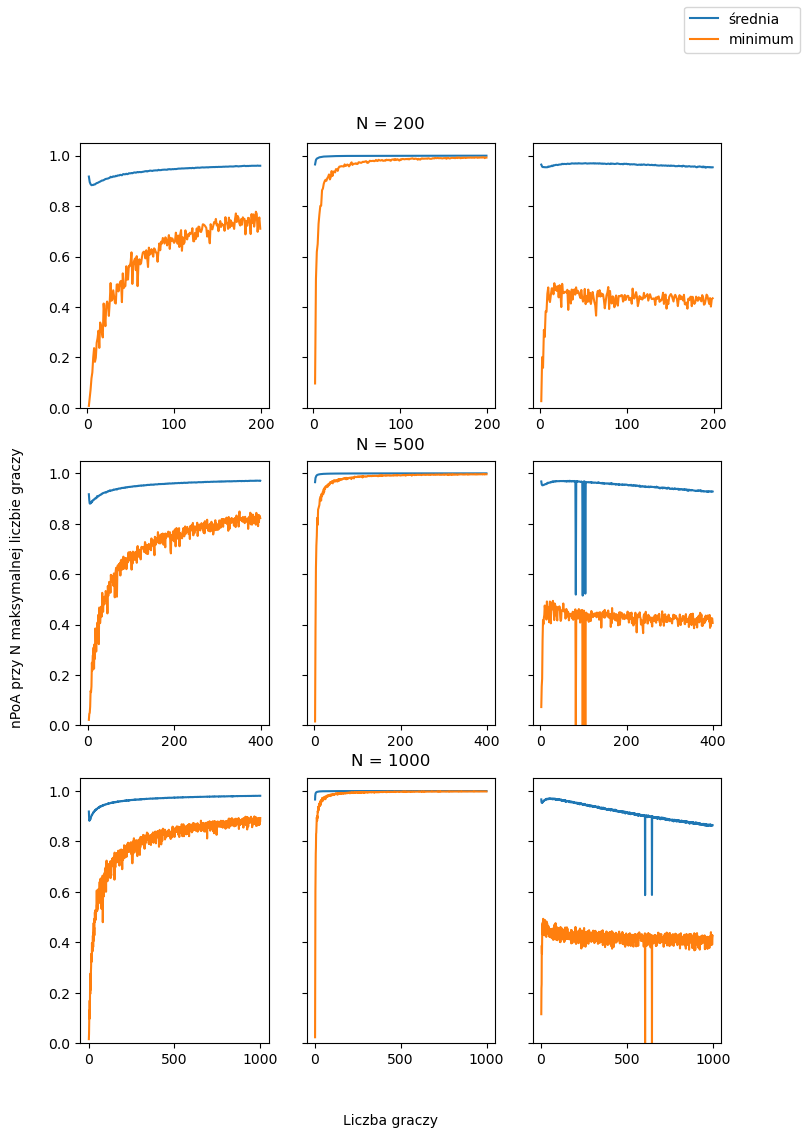

In [37]:
fig, ax = plt.subplots(3,3, figsize=(8.27, 11.69), sharey='all')
x = list(range(2,200))
ax[0,0].plot(x,PoA_mean_uni[0], label = 'średnia')
ax[0,0].plot(x,PoA_min_uni[0], label = 'minimum')
ax[0,1].plot(x,PoA_mean_norm[0], label = 'średnia')
ax[0,1].plot(x,PoA_min_norm[0], label = 'minimum')
ax[0,2].plot(x,PoA_mean_norm_over[0], label = 'średnia')
ax[0,2].plot(x,PoA_min_norm_over[0], label = 'minimum')

x = list(range(2,400))

ax[1,0].plot(x,PoA_mean_uni[1], label = 'średnia')
ax[1,0].plot(x,PoA_min_uni[1], label = 'minimum')
ax[1,1].plot(x,PoA_mean_norm[1], label = 'średnia')
ax[1,1].plot(x,PoA_min_norm[1], label = 'minimum')
ax[1,2].plot(x,PoA_mean_norm_over[1], label = 'średnia')
ax[1,2].plot(x,PoA_min_norm_over[1], label = 'minimum')

x = list(range(2,1000))
ax[2,0].plot(x,PoA_mean_uni[2], label = 'średnia')
ax[2,0].plot(x,PoA_min_uni[2], label = 'minimum')
ax[2,1].plot(x,PoA_mean_norm[2], label = 'średnia')
ax[2,1].plot(x,PoA_min_norm[2], label = 'minimum')
ax[2,2].plot(x,PoA_mean_norm_over[2], label = 'średnia')
ax[2,2].plot(x,PoA_min_norm_over[2], label = 'minimum')





labels = ['średnia', 'minimum']
fig.legend([ax[0,0], ax[0,0]], labels=labels, 
           loc="upper right") 
plt.figtext(0.5,0.89, "N = 200", ha="center", va = "bottom", fontsize=12)
plt.figtext(0.5,0.615, "N = 500", ha="center", va = "bottom", fontsize=12)
plt.figtext(0.5,0.345, "N = 1000", ha="center", va = "bottom", fontsize=12)
fig.text(0.04, 0.5, 'nPoA przy N maksymalnej liczbie graczy', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Liczba graczy', ha='center')
plt.ylim(0, 1.05)

plt.savefig('pictures/extras/No_players.png')

/tmp/ipykernel_14229/543664829.py:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax[0,0], ax[0,0]], labels=labels,


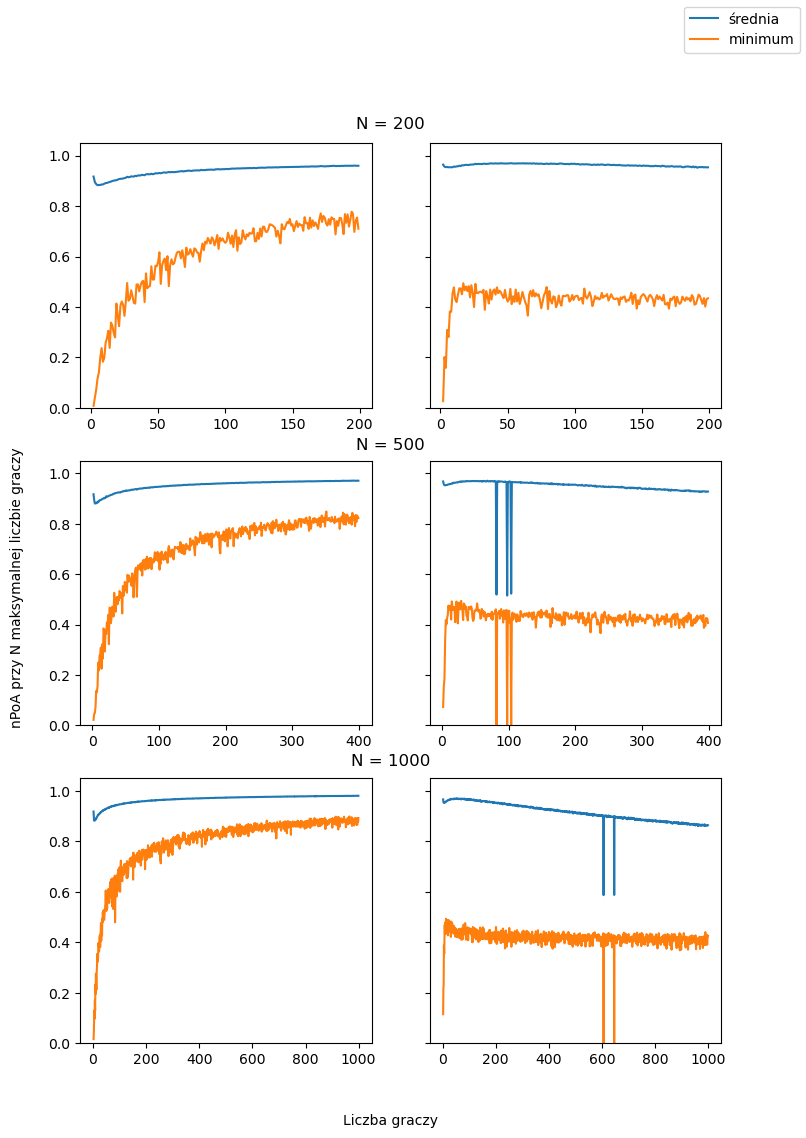

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(8.27, 11.69), sharey='all')
x = list(range(2,200))
ax[0,0].plot(x,PoA_mean_uni[0], label = 'średnia')
ax[0,0].plot(x,PoA_min_uni[0], label = 'minimum')
ax[0,1].plot(x,PoA_mean_norm_over[0], label = 'średnia')
ax[0,1].plot(x,PoA_min_norm_over[0], label = 'minimum')
x = list(range(2,400))

ax[1,0].plot(x,PoA_mean_uni[1], label = 'średnia')
ax[1,0].plot(x,PoA_min_uni[1], label = 'minimum')
ax[1,1].plot(x,PoA_mean_norm_over[1], label = 'średnia')
ax[1,1].plot(x,PoA_min_norm_over[1], label = 'minimum')
x = list(range(2,1000))
ax[2,0].plot(x,PoA_mean_uni[2], label = 'średnia')
ax[2,0].plot(x,PoA_min_uni[2], label = 'minimum')
ax[2,1].plot(x,PoA_mean_norm_over[2], label = 'średnia')
ax[2,1].plot(x,PoA_min_norm_over[2], label = 'minimum')





labels = ['średnia', 'minimum']
fig.legend([ax[0,0], ax[0,0]], labels=labels, 
           loc="upper right") 
plt.figtext(0.5,0.89, "N = 200", ha="center", va = "bottom", fontsize=12)
plt.figtext(0.5,0.615, "N = 500", ha="center", va = "bottom", fontsize=12)
plt.figtext(0.5,0.345, "N = 1000", ha="center", va = "bottom", fontsize=12)
fig.text(0.04, 0.5, 'nPoA przy N maksymalnej liczbie graczy', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Liczba graczy', ha='center')
plt.ylim(0, 1.05)

plt.savefig('pictures/extras/No_players_overbetting.png')

## Gdy zakłady pochodzą z [0,1] dla pierwszego gracza oraz [0,2] dla drugiego

### Wykres wartości równowagi Bayesa-Nasha

In [ ]:
x_1 = np.linspace(0.001, 1, 100)
x_2 = np.linspace(0.001, 2, 100)

In [ ]:
y1 = bet_uneven_Bayes_Nash(x_1, 1)
y2 = bet_uneven_Bayes_Nash(x_2, 2)
y = y1-y2

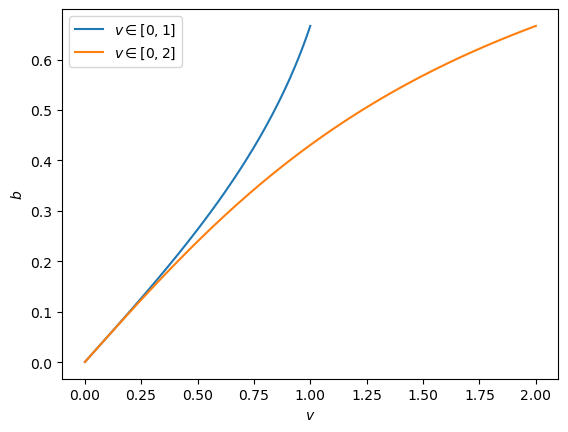

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_1, y1, label = r'$v\in [0,1]$')
ax.plot(x_2, y2, label = r'$v\in [0,2]$')
ax.legend()
plt.xlabel(r'$v$')
plt.ylabel(r'$b$')
plt.savefig('bayes_nash_uneven.png')

In [ ]:
bet_uneven_Bayes_Nash(0.9, 1)

0.5533359936191358

In [ ]:
bet_uneven_Bayes_Nash(1.1, 2)

0.46196694750704653

### Sprawdzanie średniej wartości ceny anarchii

In [ ]:
r = 10000

In [ ]:
PoA_mean = []
PoA_min = []
v1 = np.random.uniform(0, 1)
v2 = np.random.uniform(0, 2)
v = np.vstack((v1, v2))
b =  bet_random(v)
winner=np.argmax(b, axis=0)
Welf = v[winner][0][0]
Opt =v.max(axis = 0)[0]
PoA = [Welf/Opt]
PoA_mean.append(np.mean(PoA))
PoA_min.append(min(PoA))

for R in range(2,r): 
    v1 = np.random.uniform(0, 1)
    v2 = np.random.uniform(0, 2)
    v = np.vstack((v1, v2))
    b =  bet_random(v)
    winner=np.argmax(b, axis=0)
    Welf = v[winner][0][0]
    Opt =v.max(axis = 0)[0]
    PoA.append(Welf/Opt)
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

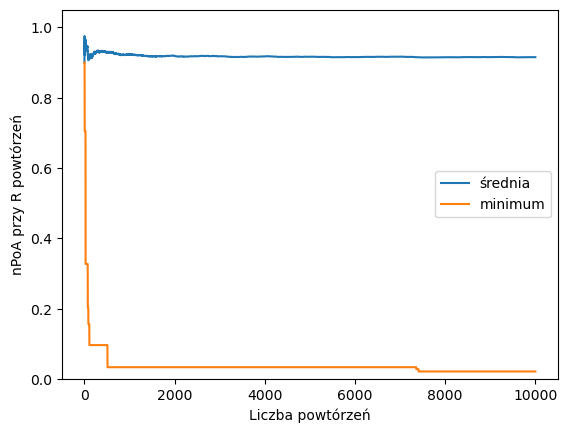

In [ ]:
fig, ax = plt.subplots()
x = list(range(1,r))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba powtórzeń")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='best')
plt.ylim(0, 1.05)
plt.savefig('pictures/uniform/uniform_uneven.png')

In [ ]:
PoA_mean = []
PoA_min = []
v1 = np.random.uniform(0, 1)
v2 = np.random.uniform(0, 2)
v = np.vstack((v1, v2))
b1 = bet_normal_uneven(v1, 1)
b2 = bet_normal_uneven(v2, 2)
b =  np.vstack((b1, b2))
winner=np.argmax(b, axis=0)
Welf = v[winner][0][0]
Opt =v.max(axis = 0)[0]
PoA = [Welf/Opt]
PoA_mean.append(np.mean(PoA))
PoA_min.append(min(PoA))


for R in range(2,r): 
    v1 = np.random.uniform(0, 1)
    v2 = np.random.uniform(0, 2)
    v = np.vstack((v1, v2))
    b1 = max(min(bet_normal_uneven(v1, 1), 1), 0)
    b2 = max(min(bet_normal_uneven(v2, 2), 2), 0)
    b =  np.vstack((b1, b2))
    winner=np.argmax(b, axis=0)
    Welf = v[winner][0][0]
    Opt =v.max(axis = 0)[0]
    PoA.append(Welf/Opt)
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

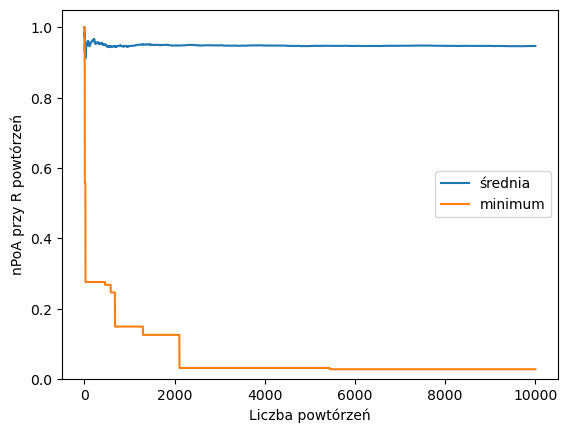

In [ ]:
fig, ax = plt.subplots()
x = list(range(1,r))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba powtórzeń")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='best')
plt.ylim(0, 1.05)
plt.savefig('pictures/extras/normal_uneven.png')